# stochastic descent

take a 3-sat instance of 7 qubits as an example

In [1]:
import math
from numpy import *
from scipy import linalg
import numpy as np
from satmethod import system,method
import datetime


n_qubit=7
result=[0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 7, 7, 7, 8, 9, 9, 10, 10, 11, 11, 12, 13, 13, 15, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 23, 24, 25, 25, 26, 27, 28, 28, 29, 29, 29, 29, 30, 31, 31, 31, 32, 32, 33, 33, 33, 33, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 39, 39, 39, 39, 39, 40, 41, 41, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 47, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 52, 53, 53, 53, 53, 54, 54, 55, 55, 55, 55, 56, 57, 58, 59, 60, 60, 61, 61, 61, 62, 63, 63, 63, 64, 64, 64, 64, 65, 65, 65, 66, 66, 66, 66, 66, 67, 67, 67, 68, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71, 71, 72, 72, 72, 72, 73, 73, 74, 74, 74, 74, 74, 75, 75, 76, 76, 76, 76, 77, 77, 78, 78, 78, 79, 80, 80, 80, 81, 81, 82, 82, 82, 82, 83, 83, 84, 84, 84, 84, 85, 85, 85, 85, 86, 86, 86, 86, 87, 87, 87, 87, 88, 88, 88, 89, 89, 90, 90, 90, 91, 92, 92, 92, 92, 93, 93, 93, 93, 94, 94, 94, 95, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 100, 100, 101, 101, 101, 101, 102, 102, 103, 103, 103, 104, 104, 105, 106, 106, 106, 107, 107, 108, 108, 108, 108, 109, 109, 109, 110, 110, 110, 111, 111, 111, 112, 112, 113, 114, 114, 115, 116, 116, 116, 117, 117, 117, 118, 118, 119, 119, 119, 120, 120, 121, 122, 122, 123, 124, 124, 124, 125, 125, 125, 126, 126, 127, 127, 127]


In [2]:
print(datetime.datetime.now())

HB,HP,psi0,psif=system.satSystem(n_qubit,result)

print(datetime.datetime.now())    #### 50min

2021-05-08 09:36:12.924022
2021-05-08 09:36:12.930470


In [4]:
print(datetime.datetime.now())

T=50       ### dt=0.2    iter: 14 ncan: 129
Mcut=5
psd=[]

for i in range(20):
   
    obs, fid2=method.StochasticDescent(n_qubit,T,Mcut,HB,HP,psi0,psif)   
    print("sd",T,obs,fid2)    
    psd.append(fid2)                            
    
print(datetime.datetime.now())

2021-05-08 09:38:17.336620
[ 0.    0.1   0.15  0.12 -0.06]
iter: 11 ncan: 73
sd 50 [0.02 0.19 0.19 0.14 0.04] 0.722720150136686
[ 0.15 -0.01  0.07  0.02  0.01]
iter: 15 ncan: 110
sd 50 [ 0.19  0.12  0.11 -0.01  0.03] 0.9913885684693554
[ 0.04  0.19  0.17  0.12 -0.12]
iter: 7 ncan: 59
sd 50 [ 0.05  0.13  0.19  0.16 -0.14] 0.667146259953334
[ 0.07 -0.02 -0.03 -0.18 -0.07]
iter: 4 ncan: 38
sd 50 [ 0.08 -0.04 -0.06 -0.16 -0.05] 0.8950360246525877
[-0.1  -0.17 -0.11 -0.17  0.18]
iter: 10 ncan: 87
sd 50 [-0.08 -0.2  -0.14 -0.15  0.09] 0.8548212168919235
[-0.05 -0.13  0.06 -0.13 -0.18]
iter: 18 ncan: 111
sd 50 [ 1.04083409e-17  4.00000000e-02  1.50000000e-01 -2.00000000e-01
 -2.00000000e-01] 0.5539678273596302
[-0.2   0.    0.07  0.04 -0.02]
iter: 9 ncan: 68
sd 50 [-0.2   0.03 -0.01  0.11 -0.07] 0.825567852240378
[ 0.06  0.19  0.05 -0.01 -0.13]
iter: 15 ncan: 112
sd 50 [ 9.00000000e-02  2.00000000e-01  3.46944695e-18  6.00000000e-02
 -1.00000000e-02] 0.9645078263871014
[ 0.03 -0.2  -0.09  0.1

# Plot the evolution path

In [11]:
import math
from numpy import *
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def plotpath(obs):

    Cut=5

    a, bb = np.linalg.eig(HB)
    idx = a.argsort()[::1]   
    a = a[idx]
    bb = bb[:,idx]    

    a, bp = np.linalg.eig(HP)
    idx = a.argsort()[::1]   
    a = a[idx]
    bp = bp[:,idx]

    ax=[]
    ay=[]
    ay2=[]
    ac=[]
    acc=[]
    ae=[]
    aa1=[]
    aax=[]
    dae=[]
    plt.ion() 
    wf=bb[:,0]
    wff=bb[:,0]

    T=50
    dt=0.5
    NL=int(T/dt)
    for ff in range(0,NL):
        t=dt*ff
        ax.append(t)
        st=t/T
        for i in range(1,Cut+1):
            st=st+obs[0,i-1]* math.sin(i*3.1415*t/T)
        H=(1-st)*HB+st*HP
        Bt=linalg.expm(-1j*np.asarray(H)*dt)
        wf=np.matmul(Bt, wf)


        a1, bp1 = np.linalg.eig(H)
        idx = a1.argsort()[::1]   
        a1 = a1[idx]
        aa1.append(a1[0])
        aax.append(st)

        c=np.dot(bp[:,0].conjugate().T,wf)    ####overlap
        c1=abs(c)**2
        ac.append(c1)


        ee=np.dot(HP,wf)
        ee=np.dot(wf.conjugate().T,ee)     ##ground energy
        ae.append(ee)



    plt.clf()              # 清除之前画的图
    plt.plot(ax,aax)
    plt.title('s(t)')


    print(ee,c1)


[[ 0.19  0.12  0.11 -0.01  0.03]]
(0.008885268842489618+0j) 0.991315420480211


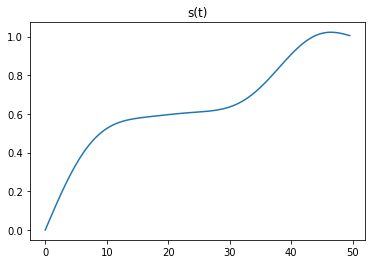

In [12]:
obs=np.array([[ 0.19 , 0.12,  0.11, -0.01, 0.03]]) 
print(obs)

plotpath(obs)